<a href="https://colab.research.google.com/github/Tiamiyu1/Data-Science-Approach-to-Machine-Learning-Modeling/blob/main/ML_Modeling_Approach_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Approach to Machine Learning  Modeling with Linear Regression

## 1.0 Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

## 2.0 Read the csv file

In [2]:
path ='https://raw.githubusercontent.com/Tiamiyu1/Simplistic-Approach-to-Machine-Learning-Modeling-with-Linear-Regression/main/student.csv'
data = pd.read_csv(path)
data.head(3)

,FIRST NAME,LAST NAME,GENDER,MATH,ENGLISH,BIOLOGY,ECONOMICS,AGRIC,INTELIGENCE
0,ATTAH,OPPOR,MALE,75,100.00,100.0,55,77.0,7.61
1,IMRAN,ROFID,FEMALE,70,33.33,100.0,55,97.5,7.73
2,JAMES,WALLY,MALE,80,0.00,85.0,68,100.0,7.72


## 3.0 Data Description

### 3.1 df.info()

This tells us number of rows and columns in our dataset

It tells us the numbers of non-null values we have in each colum

It also inform us about data type of each of the column

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FIRST NAME   26 non-null     object 
 1   LAST NAME    26 non-null     object 
 2   GENDER       26 non-null     object 
 3   MATH         26 non-null     int64  
 4   ENGLISH      26 non-null     float64
 5   BIOLOGY      26 non-null     float64
 6   ECONOMICS    26 non-null     int64  
 7   AGRIC        26 non-null     float64
 8   INTELIGENCE  26 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.0+ KB


### 3.2 df.describe()
This gives us descriptive statistics include those that summarize the central
tendency like the mean, dispersion like standard deviation, count, minimum and maximum values in each column, first quartile, median and third quartile.

In [4]:
data.describe()

,MATH,ENGLISH,BIOLOGY,ECONOMICS,AGRIC,INTELIGENCE
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,80.000000,74.487308,77.692308,71.115385,62.500000,6.944615
std,23.664319,24.238665,22.901125,19.089949,26.835797,1.488122
min,0.000000,0.000000,0.000000,35.000000,14.500000,4.080000
25%,75.000000,60.832500,65.000000,56.000000,50.625000,6.200000
50%,85.000000,78.335000,80.000000,70.000000,67.250000,7.210000
75%,100.000000,95.835000,97.500000,84.500000,79.500000,7.745000
max,100.000000,100.000000,100.000000,100.000000,100.000000,9.720000


### 3.3 df.columns 

This gives the names of all the columns in the dataframe(df)

In [5]:
data.columns

Index(['FIRST NAME', 'LAST NAME', 'GENDER', 'MATH', 'ENGLISH', 'BIOLOGY',
       'ECONOMICS', 'AGRIC', 'INTELIGENCE'],
      dtype='object')

### 3.4 df.shape

This gives the number of rows and columns in the df. 

df.shape[0] gives the number of rows

df.shape[1] gives the number of columns

In [6]:
data.shape

(26, 9)

In [7]:
data.shape[0]

26

In [8]:
data.shape[1]

9

## 4.0 Data Cleaning and preprocessing

Here, we check for irregular data and missing values

### 4.1 Missing Values

In [9]:
# Check if there is any null value across the columns
data.isnull().any()

FIRST NAME     False
LAST NAME      False
GENDER         False
MATH           False
ENGLISH        False
BIOLOGY        False
ECONOMICS      False
AGRIC          False
INTELIGENCE    False
dtype: bool

In [10]:
### Total number of missing values per column
data.isnull().sum()

FIRST NAME     0
LAST NAME      0
GENDER         0
MATH           0
ENGLISH        0
BIOLOGY        0
ECONOMICS      0
AGRIC          0
INTELIGENCE    0
dtype: int64

In [11]:
### %  of missing values per column
data.isnull().sum()/data.shape[0] *100

FIRST NAME     0.0
LAST NAME      0.0
GENDER         0.0
MATH           0.0
ENGLISH        0.0
BIOLOGY        0.0
ECONOMICS      0.0
AGRIC          0.0
INTELIGENCE    0.0
dtype: float64

### 4.2 Check for duplicate entries

In [12]:
# Any duplicate value?
data.duplicated().any()

False

In [13]:
# Sum of duplicate values
data.duplicated().sum()

0

### 4.3 Data type conversion

In [14]:
data.dtypes

FIRST NAME      object
LAST NAME       object
GENDER          object
MATH             int64
ENGLISH        float64
BIOLOGY        float64
ECONOMICS        int64
AGRIC          float64
INTELIGENCE    float64
dtype: object

The data is in the correct data type with no missing value

## 5.0 Exploratory Data Analysis

#### 5.1 unique values in a column

In [15]:
data['FIRST NAME'].unique()

array(['ATTAH ', 'IMRAN', 'JAMES', 'PICHARDS', 'SUCCESS', 'FLINT',
       'KIEKIE', 'ANGELA', 'BALDWIN', 'CREED ', 'KING', 'KASADY',
       'SHAGGI', 'MILES', 'RODERICK', 'JONES', 'PATRICK', 'FAMOUS',
       'HENRY', 'EMIL', 'KENNY', 'FREAKY', 'FRED'], dtype=object)

In [16]:
data['GENDER'].unique()

array(['MALE', 'FEMALE'], dtype=object)

#### 5.2 Number of unique values in a column

In [17]:
data['FIRST NAME'].nunique()

23

In [18]:
data['GENDER'].nunique()

2

### 5.3 Value count per categorical variable

In [19]:
data['GENDER'].value_counts() # default is descending order, can be resorted

MALE      15
FEMALE    11
Name: GENDER, dtype: int64

### 5.3 Data correlation coefficient

In [20]:
data.corr()

,MATH,ENGLISH,BIOLOGY,ECONOMICS,AGRIC,INTELIGENCE
MATH,1.000000,-0.073230,0.149463,-0.088987,0.283442,0.272438
ENGLISH,-0.073230,1.000000,-0.041866,0.276611,-0.099030,0.181951
BIOLOGY,0.149463,-0.041866,1.000000,-0.187161,0.251965,0.345487
ECONOMICS,-0.088987,0.276611,-0.187161,1.000000,0.281440,0.582391
AGRIC,0.283442,-0.099030,0.251965,0.281440,1.000000,0.894200
INTELIGENCE,0.272438,0.181951,0.345487,0.582391,0.894200,1.000000


## 6.0 Data Visualization

### 6.1 Countplot for gender

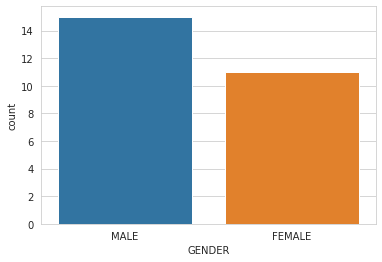

In [21]:
sns.countplot(data.GENDER)

### 6.2 Boxplot for intelligence by gender 

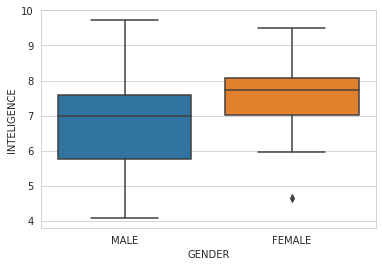

In [22]:
sns.boxplot(data.GENDER, data.INTELIGENCE)

### 6.3 Histogram distribution for intelligence with KDE

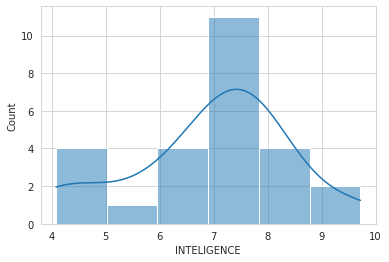

In [23]:
sns.histplot(data.INTELIGENCE, kde=True)

### 6.4 Lineplot to show the relationship between a subject and level of intelligence

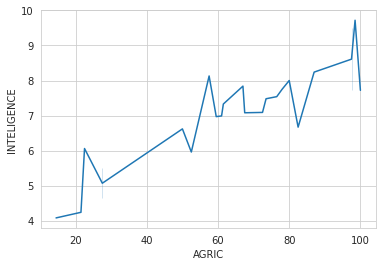

In [24]:
sns.lineplot(data.AGRIC, data.INTELIGENCE)

### 6.5 Heatmap to show the correlation between numerical variables + correlation coefficeint 

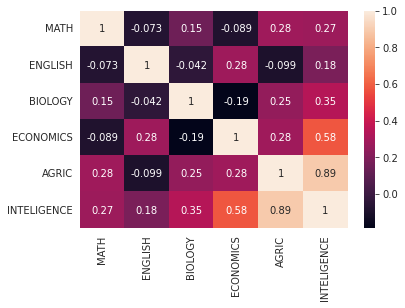

In [25]:
sns.heatmap(data.corr(), annot=True)

### 6.5 Pairplot to show the relation between all numerical variables

<Figure size 288x360 with 0 Axes>

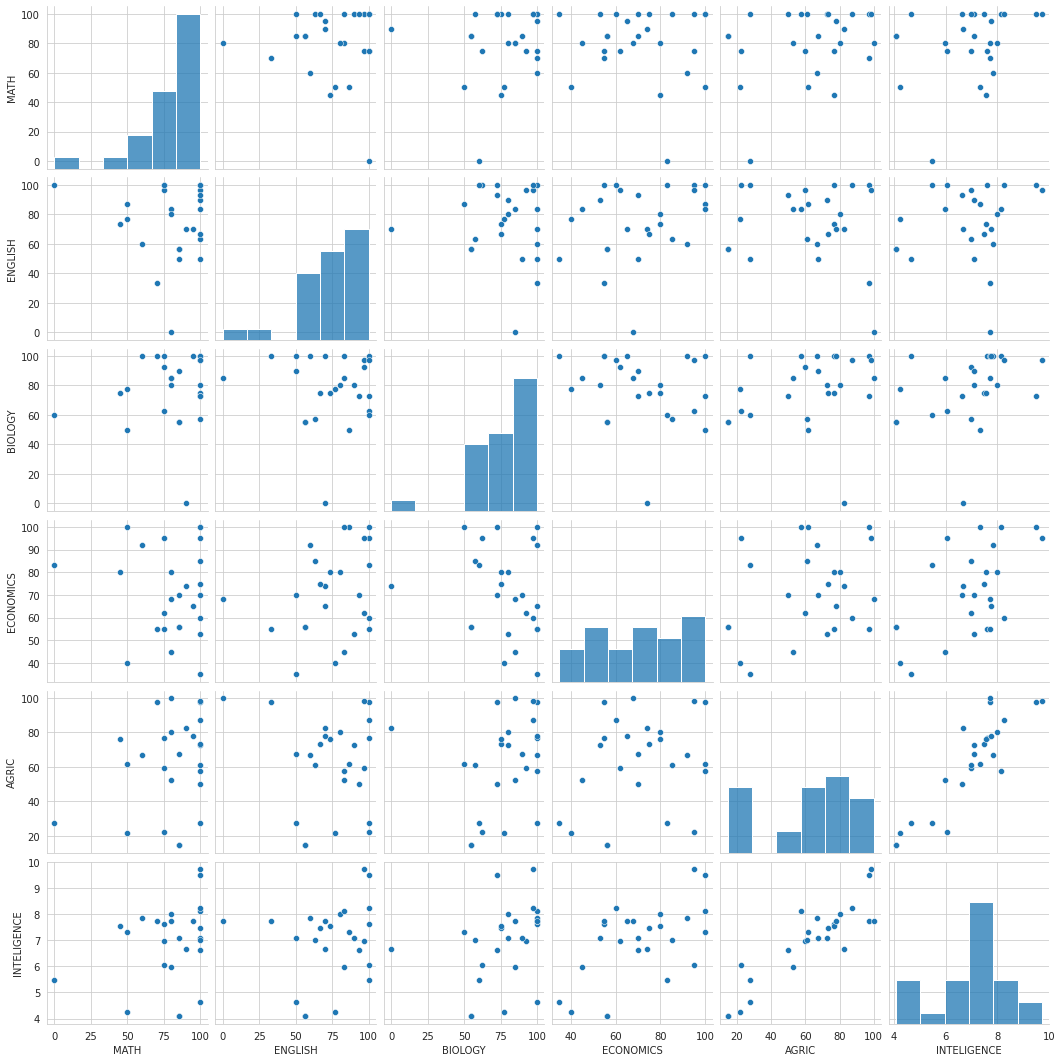

In [26]:
plt.figure(figsize=(4,5))
sns.pairplot(data)

Watch out for part 2...

Simple/Multiple Linear Regression
* Feature extraction/engineering
* Feature Selection
* Model Training
* Prediction